In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [91]:
questions =  pd.read_parquet('/Users/hungnguyen/Masters/StackOverFlow-MBDProject/data/questions-with-ans-and-metrics-cluster-small.parquet')

In [92]:
questions.head()

,_Id,_PostTypeId,_AcceptedAnswerId,_CreationDate,_Score,_ViewCount,_Body,_Title,_Tags,_AnswerCount,...,AnswerDurationSeconds,AnswerDurationDays,AnswerDurationMinute,AnswerDurationHour,Flesch_Kincard_Grade,Flesch_reading_ease,Coleman_Liau_index,code_percentage,cos_sim_post_title,cos_sim_title_tag
0,70544085,1,70544175,2021-12-31 15:32:28.547,2,446,<p>I am trying to build a plugin for a Minecra...,Minecraft Plugin ClassNotFound Error from Exte...,<java><jar><serial-port><minecraft><bukkit>,1,...,820,0,13.666667,0.227778,26.44852955787383,-92.36498840867688,53.778360655737686,0.003761969904240766,0.16423917478829259,0.18443191662261307
1,68054933,1,68075423,2021-06-20 08:35:25.807,2,107,<p>I want to make some nice separation between...,centering and filling multiple space with # in...,<vim>,1,...,128920,1,2148.666667,35.811111,6.465937499999999,86.70197916666667,13.498749999999998,0,0.13117382232697472,0.2596979932401625
2,70985859,1,71490364,2022-02-04 10:45:38.710,1,513,<p>I have located a couple of links showing ho...,Moving Messages received from Azure Service Bu...,<apache-spark><azureservicebus><azure-databricks>,1,...,3413733,40,56895.550000,948.259167,19.43462962962963,27.860833333333375,18.240987654320985,0,0.3901951887066941,0.2232732128507234
3,74175556,1,74175868,2022-10-23 21:46:12.530,5,90,"<p>Consider this program:</p>\n<pre class=""lan...",What is the effect of the change to the defini...,<concurrency><c++20><atomic><memory-barriers><...,1,...,5287,1,88.116667,1.468611,7.591889692585898,70.78414556962026,19.641856540084394,0.0019973368841544607,0.5750119079013025,0.1491795668838835
4,72646073,1,72653266,2022-06-16 10:43:42.100,0,94,<p>I have a scenario where a vendor can hold w...,"Laravel; optimal database, model relationships...",<php><mysql><laravel>,1,...,43583,1,726.383333,12.106389,16.620216561640188,31.493246649507427,29.44876897133221,0,0.04457581288468305,0.12536693798731732


In [93]:
questions.count()

_Id                           103444
_PostTypeId                   103444
_AcceptedAnswerId             103444
_CreationDate                 103444
_Score                        103444
_ViewCount                    103444
_Body                         103444
_Title                        103444
_Tags                         103444
_AnswerCount                  103444
_CommentCount                 103444
_FavoriteCount                 10275
AnswerId                      103444
AcceptedAnswerText            103444
AcceptedAnswerCreationDate    103444
TagsList                      103444
metrics                       103444
AnswerDurationSeconds         103444
AnswerDurationDays            103444
AnswerDurationMinute          103444
AnswerDurationHour            103444
Flesch_Kincard_Grade          103444
Flesch_reading_ease           103444
Coleman_Liau_index            103444
code_percentage               103444
cos_sim_post_title            103444
cos_sim_title_tag             103444
d

In [94]:
def bar_bin_plot(bin_plot, col, xlabel=None, ylabel=None, title=None):
    questions[bin_plot] = pd.cut(questions[col], bins=bin_plot)
    questions.groupby(questions[bin_plot])[col].count().plot.bar()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)


ValueError: Columns must be same length as key

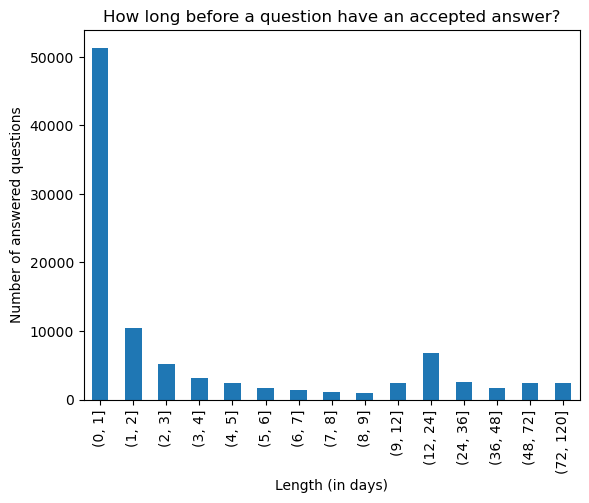

In [95]:
max_hour = questions.AnswerDurationHour.max()
x = 'AnswerDurationHour'
binsHr = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 24, 36, 48, 72, 120]
questions['binsHr'] = pd.cut(questions[x], bins=binsHr)
questions.groupby('binsHr')[x].count().plot.bar()
plt.title('How long before a question have an accepted answer?')
plt.xlabel('Length (in days)')
plt.ylabel('Number of answered questions')

bar_bin_plot(binsHr, 'AnswerDurationHour')

-40.9 981070.5666666667


Text(0, 0.5, 'Number of answered questions')

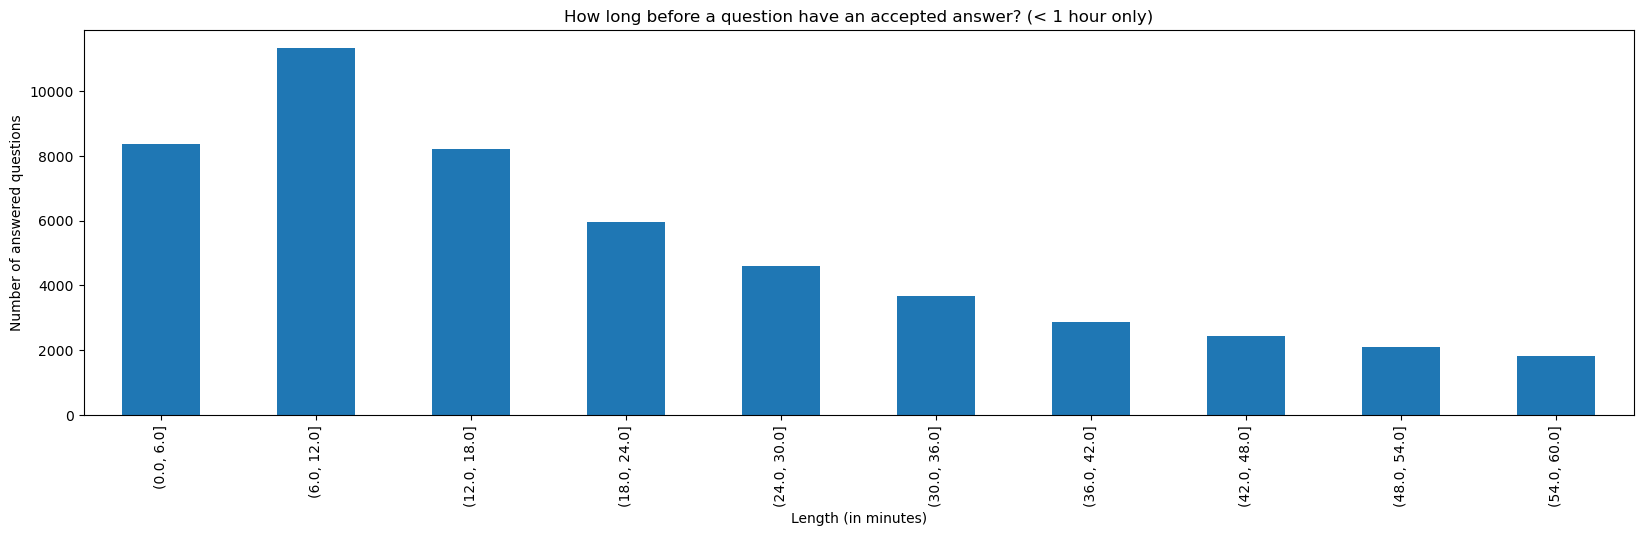

In [96]:
max_minutes = questions.AnswerDurationMinute.max()
min_minutes = questions.AnswerDurationMinute.min()
print(min_minutes, max_minutes)
binsMin = np.linspace(0, 60, 11).tolist()

questions['binsMin'] = pd.cut(questions.AnswerDurationMinute, bins=binsMin)
questions.groupby('binsMin')['AnswerDurationMinute'].count().plot.bar(figsize=(20, 5))
plt.title('How long before a question have an accepted answer? (< 1 hour only)')
plt.xlabel('Length (in minutes)')
plt.ylabel('Number of answered questions')



In [97]:
questions[['Flesch_Kincard_Grade', 'Flesch_reading_ease', 'Coleman_Liau_index', 'code_percentage', 'cos_sim_post_title', 'cos_sim_title_tag', 'AnswerDurationMinute']] = questions[['Flesch_Kincard_Grade', 'Flesch_reading_ease', 'Coleman_Liau_index', 'code_percentage', 'cos_sim_post_title', 'cos_sim_title_tag', 'AnswerDurationMinute']].astype('float')

In [98]:
questions[['Flesch_Kincard_Grade', 'Flesch_reading_ease', 'Coleman_Liau_index', 'code_percentage', 'cos_sim_post_title', 'cos_sim_title_tag', 'AnswerDurationMinute', '_Score']].corr()

,Flesch_Kincard_Grade,Flesch_reading_ease,Coleman_Liau_index,code_percentage,cos_sim_post_title,cos_sim_title_tag,AnswerDurationMinute,_Score
Flesch_Kincard_Grade,1.000000,-0.865483,0.556550,-0.069432,-0.081895,0.010481,0.013328,0.005940
Flesch_reading_ease,-0.865483,1.000000,-0.758868,0.092699,0.091646,-0.031086,-0.026516,-0.020937
Coleman_Liau_index,0.556550,-0.758868,1.000000,-0.153515,-0.222133,-0.001372,0.001626,0.001929
code_percentage,-0.069432,0.092699,-0.153515,1.000000,0.033619,0.007973,0.008223,0.029102
cos_sim_post_title,-0.081895,0.091646,-0.222133,0.033619,1.000000,0.016397,0.032782,0.029835
cos_sim_title_tag,0.010481,-0.031086,-0.001372,0.007973,0.016397,1.000000,0.040840,0.015901
AnswerDurationMinute,0.013328,-0.026516,0.001626,0.008223,0.032782,0.040840,1.000000,0.051841
_Score,0.005940,-0.020937,0.001929,0.029102,0.029835,0.015901,0.051841,1.000000


682


Text(0, 0.5, 'Number of answered questions')

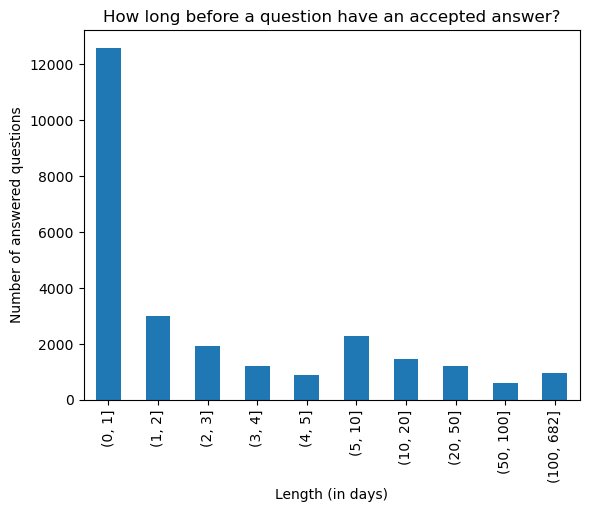

In [99]:
max_days = questions.AnswerDurationDays.max()
print(max_days)
binsDay = [0, 1, 2, 3, 4, 5, 10, 20, 50, 100,  max_days]
questions['binsDay'] = pd.cut(questions.AnswerDurationDays, bins=binsDay)
# plt.xticks(bins)
questions.groupby('binsDay')['AnswerDurationDays'].count().plot.bar()
plt.title('How long before a question have an accepted answer?')
plt.xlabel('Length (in days)')
plt.ylabel('Number of answered questions')

Text(0, 0.5, 'Number of answered questions')

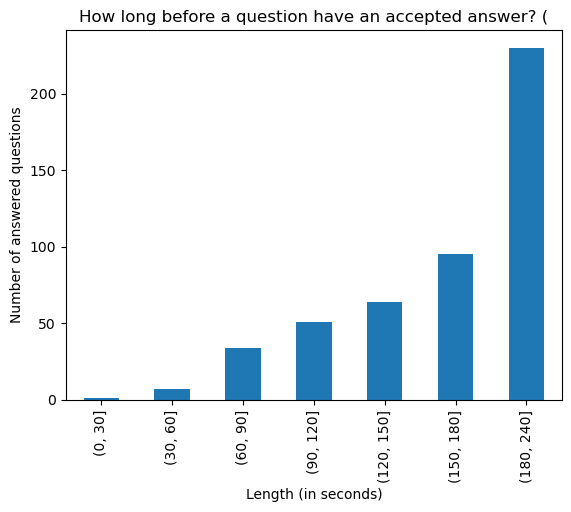

In [82]:
binsSec = [0, 30, 60, 90, 120, 150, 180, 240]
questions['binsSec'] = pd.cut(questions.AnswerDurationSeconds, bins=binsSec)
# plt.xticks(bins)
questions.groupby('binsSec')['AnswerDurationSeconds'].count().plot.bar()
plt.title('How long before a question have an accepted answer? (')
plt.xlabel('Length (in seconds)')
plt.ylabel('Number of answered questions')

0.7485029940119761


Text(0, 0.5, 'Number of answered questions')

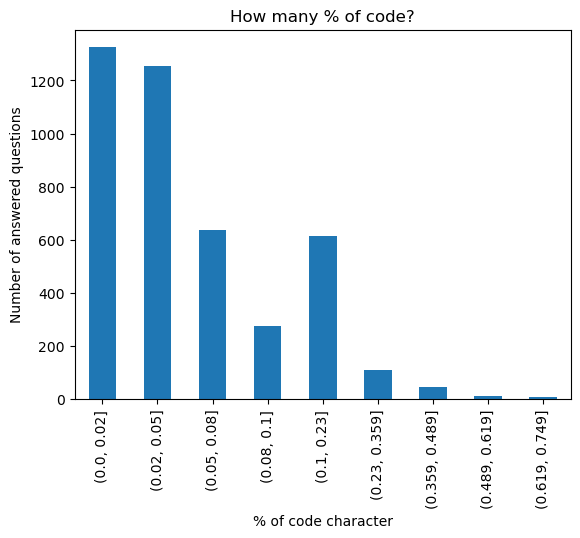

In [83]:
max_codes = questions.code_percentage.max()
print(max_codes)
binsCode = [0, 0.02, 0.05, 0.08] + np.linspace(0.1, max_codes, 6).tolist()


questions['binsCode'] = pd.cut(questions.code_percentage, bins=binsCode)
# plt.xticks(bins)
questions.groupby('binsCode')['code_percentage'].count().plot.bar()
plt.title('How many % of code?')
plt.xlabel('% of code character')
plt.ylabel('Number of answered questions')

In [43]:
questions.iloc[7272]

_Id                                                                    72315506
_PostTypeId                                                                   1
_AcceptedAnswerId                                                      72315609
_CreationDate                                        2022-05-20 06:03:08.267000
_Score                                                                       -2
_ViewCount                                                                  220
_Body                         <p>I have a string but <strong>it contains two...
_Title                                             How to split two json String
_Tags                                <java><json><spring><spring-boot><parsing>
_AnswerCount                                                                  1
_CommentCount                                                                13
_FavoriteCount                                                              NaN
AnswerId                                